## Daily Data

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=2)

In [3]:
df.Date = df.Date.apply(pd.to_datetime)

In [4]:
df.set_index('Date', inplace=True)

## Weekly Data

In [5]:
df_weekly = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=1)

In [6]:
df_weekly = df_weekly.T

In [7]:
new_header = df_weekly.iloc[0]
df_weekly = df_weekly[1:]
df_weekly.columns = new_header

In [8]:
df_weekly.reset_index(inplace=True)

In [9]:
df_weekly['index'] = df_weekly['index'].apply(pd.to_datetime)

In [10]:
df_weekly.set_index('index', inplace=True)

## Monthly Data

In [11]:
df_monthly = pd.read_excel('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx', sheet_name=0)

In [12]:
df_monthly = df_monthly.T
new_header = df_monthly.iloc[0]
df_monthly = df_monthly[1:]
df_monthly.columns = new_header

In [13]:
df_monthly.Date = df_monthly.Date.apply(pd.to_datetime)

In [14]:
df_monthly.set_index('Date', inplace=True)

## Merge

In [15]:
df_merge = pd.merge(df, df_weekly, how='outer', left_index=True, right_index=True)

In [16]:
df_merge = pd.merge(df_merge, df_monthly, how='outer', left_index=True, right_index=True)

In [17]:
# df_merge.tail(50)

In [18]:
df_merge.to_csv('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/merge.csv')

## Data viz

In [28]:
df_viz = pd.read_csv('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/merge.csv')

In [29]:
df_viz.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [33]:
df_viz['index'] = df_viz['index'].apply(pd.to_datetime)

In [34]:
df_viz.set_index('index', inplace=True)

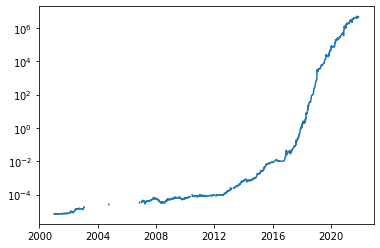

In [35]:
plt.plot(df_viz.Dolartoday)
plt.yscale('log')

In [51]:
df_viz

,Year_x,Month_x,Dolartoday,Source,Oil WTI,Oil Brent,month,year,BM (BsS),M2 (BsS),Year_y,Month_y,Inflation (oppo),Inflation (bcv),Recaudacion SENIAT (BsF miles),Oil Production
index,,,,,,,,,,,,,,,,
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,Enero,8.11367,8.11367,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,Febrero,7.97339,7.97339,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,Marzo,6.17259,6.17259,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,Abril,8.55186,8.55186,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,Mayo,12.59082,12.59082,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-13,2021.0,11.0,4560000.0,dolartoday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-14,2021.0,11.0,4540000.0,dolartoday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-15,2021.0,11.0,4610000.0,dolartoday,80.85,80.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_viz['fx_log'] = np.log(df_viz['Dolartoday'])

In [69]:
temp = df_viz.resample('m').last()

In [75]:
df_viz['Dolartoday'].describe()

count    4.983000e+03
mean     2.265511e+05
std      8.116299e+05
min      6.992500e-06
25%      8.540000e-05
50%      1.790200e-03
75%      2.629310e+01
max      5.050000e+06
Name: Dolartoday, dtype: float64

In [76]:
temp['target'] = temp['fx_log'].diff()

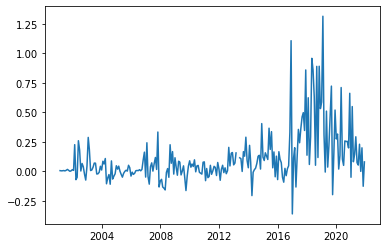

In [79]:
plt.plot(temp['target'])

ValueError: setting an array element with a sequence.

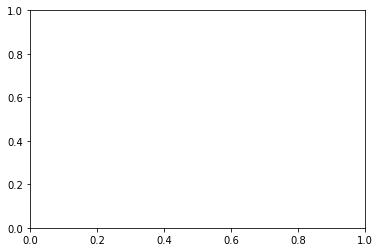

In [48]:
plt.plot(temp.Dolartoday)